In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split


In [2]:

# %%
digits = datasets.load_digits()

In [3]:
#
# Tamaño del dataset
#
digits.images.shape

(1797, 8, 8)

In [4]:
# %%
#
# Clases
#
set(digits.target)

{np.int64(0),
 np.int64(1),
 np.int64(2),
 np.int64(3),
 np.int64(4),
 np.int64(5),
 np.int64(6),
 np.int64(7),
 np.int64(8),
 np.int64(9)}

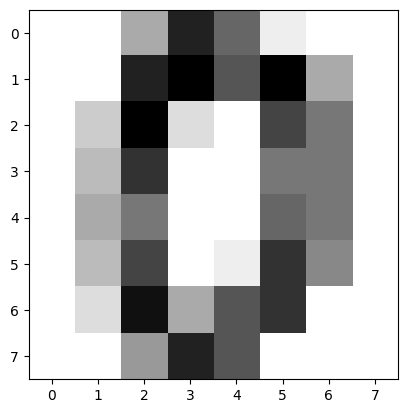

In [5]:
# %%
#
# Ejemplo de una imagen
#
plt.figure()
plt.imshow(digits.images[0], cmap=plt.cm.binary)
plt.grid(False)
plt.show()

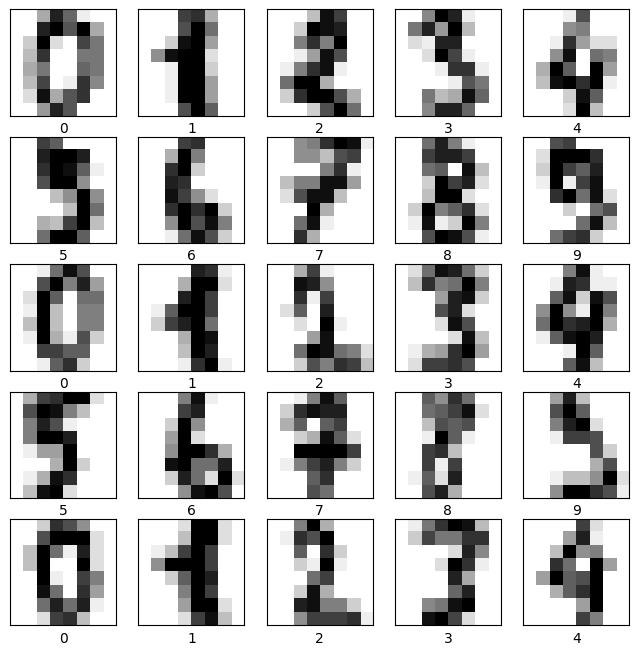

In [6]:

# %%
plt.figure(figsize=(8, 8))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(digits.images[i], cmap=plt.cm.binary)
    plt.xlabel(digits.target[i])
plt.show()

In [7]:
# %%
# Cambio de las dimensiones de los datos
#
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
data.shape#


(1797, 64)

In [8]:

# %%
#
# Particionamiento de los datos
#
X_train, X_test, y_train, y_test = train_test_split(
    data,
    digits.target,
    test_size=0.5,
    shuffle=False,)

In [9]:

from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(max_iter=1000)
estimator

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [10]:

estimator.fit(
    X_train,
    y_train,
)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [11]:
estimator.intercept_

array([ 0.00050529, -0.07018711,  0.00037915,  0.02613522,  0.00701811,
       -0.01338731, -0.00226943,  0.01159971,  0.02821908,  0.01198729])

In [12]:

from sklearn.metrics import accuracy_score

#
# Muestra de entrenamiento
#
accuracy_score(y_true=y_train, y_pred=estimator.predict(X_train))


1.0

In [13]:

#
# Muestra de prueba
#
predictions = estimator.predict(X_test)
predicted_proba = estimator.predict_proba(X_test)

accuracy_score(y_true=y_test, y_pred=predictions)

0.92880978865406

Confusion matrix:
[[84  0  0  0  1  0  3  0  0  0]
 [ 0 82  0  1  0  1  0  0  2  5]
 [ 0  0 84  2  0  0  0  0  0  0]
 [ 0  0  0 76  0  4  0  2  7  2]
 [ 0  0  0  0 84  0  4  0  0  4]
 [ 0  2  0  0  0 85  1  0  0  3]
 [ 0  1  0  0  0  0 90  0  0  0]
 [ 0  0  0  0  1  1  0 85  0  2]
 [ 0  3  1  0  0  4  1  0 79  0]
 [ 1  0  0  2  0  2  0  0  1 86]]


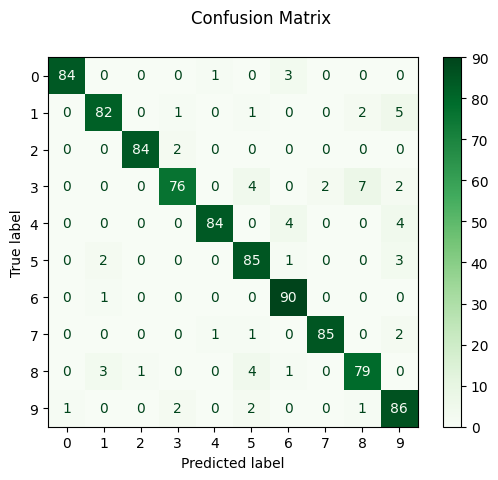

In [14]:
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    predictions,
    cmap="Greens",
)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")




In [15]:


def plot_image(i, predicted_label, true_label, predicted_proba, img):

    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    #
    plt.imshow(img, cmap=plt.cm.binary)

    if predicted_label[i] == true_label:
        color = "blue"
    else:
        color = "red"

    plt.xlabel(
        "{} {:2.0f}% ({})".format(
            predicted_label[i],
            100 * max(predicted_proba[i, :]),
            true_label,
        ),
        color=color,
    )


def plot_value_array(i, predicted_proba, predicted_label, true_label):
    #
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predicted_proba[i, :], color="#777777")
    plt.ylim([0, 1])
    #
    thisplot[predicted_label[i]].set_color("red")
    thisplot[true_label[i]].set_color("blue")



    

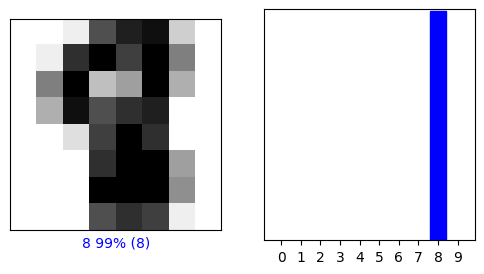

In [16]:

i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(
    i,
    predictions,
    y_test,
    predicted_proba,
    X_test.reshape(len(X_test), 8, 8),
)
plt.subplot(1, 2, 2)
plot_value_array(
    i,
    predicted_proba,
    predictions,
    y_test,
)
plt.show()    
    
    
    

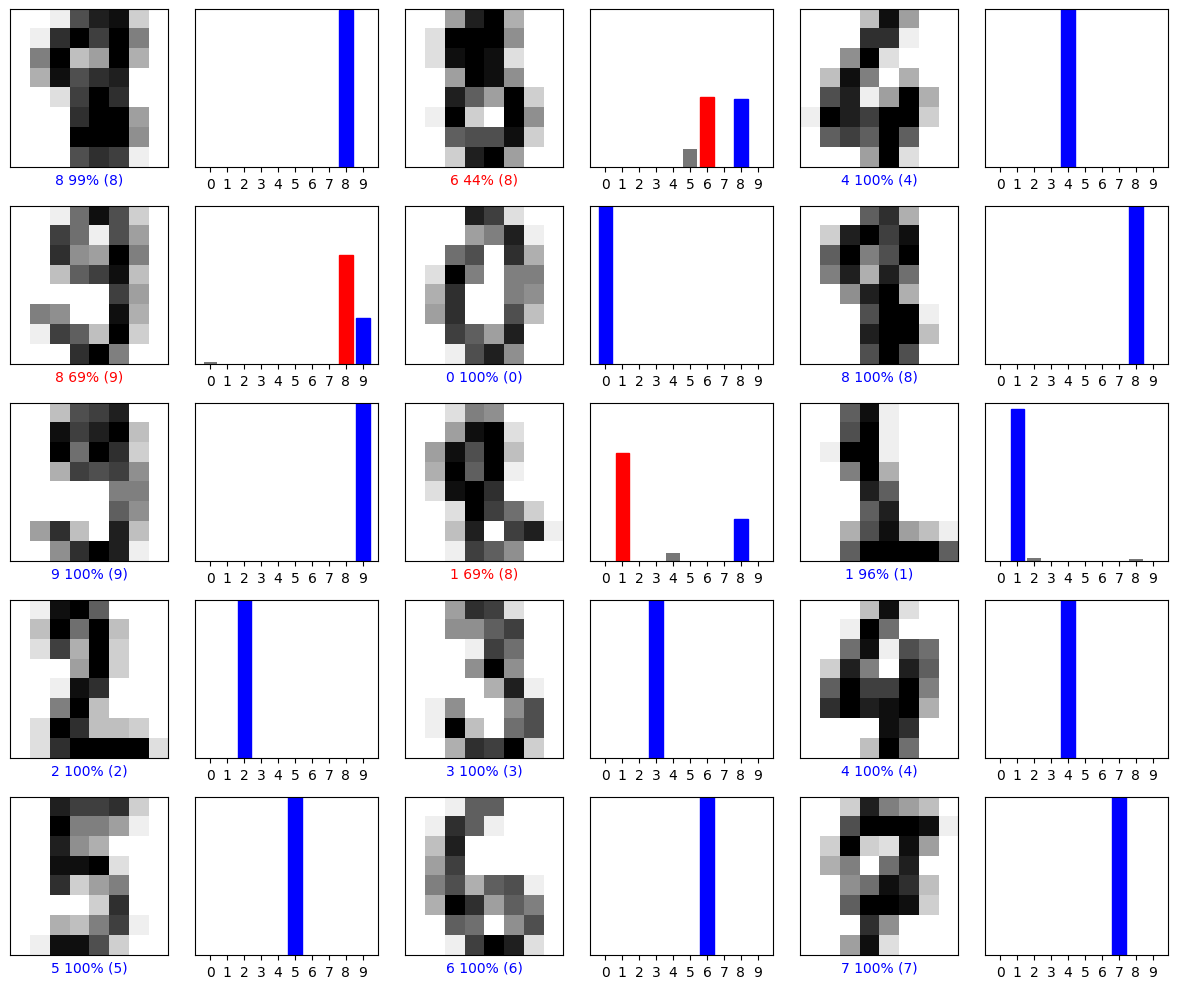

In [17]:

num_rows = 5
num_cols = 3
num_images = num_rows * num_cols

plt.figure(figsize=(2 * 2 * num_cols, 2 * num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 1)
    plot_image(
        i,
        predictions,
        y_test,
        predicted_proba,
        X_test.reshape(len(X_test), 8, 8),
    )
    plt.subplot(num_rows, 2 * num_cols, 2 * i + 2)
    plot_value_array(
        i,
        predicted_proba,
        predictions,
        y_test,
    )
plt.tight_layout()
plt.show()


In [18]:



import pickle

with open("estimator.pickle", "wb") as file:
    pickle.dump(estimator, file)
    
    